In [1]:
'''
    IRENA Electricity 보고서의 데이터를 그래프로 출력한다.

    todo
    [] 그래프를 plotly로 출력한다.
    [] G20 그래프를 그린다.
    [] G8 그래프를 그린다.
'''


'\n    IRENA Electricity 보고서의 데이터를 그래프로 출력한다.\n\n    todo\n    [] 그래프를 plotly로 출력한다.\n    [] G20 그래프를 그린다.\n    [] G8 그래프를 그린다.\n'

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import font_manager

import pprint
import numpy as np

In [2]:
# pandas configuration
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

In [3]:
# constants
k_figsave = False
k_figsave = True
k_data_dir = '..\\data'

# _01: 긴 국가명을 짧은 국가명으로 바꿨다. USA, UK, Russia
k_merged_data_file_name = r'irena_elec_2021_01.xlsx'

# oecd를 focus countries로 바꿨다. Russia 추가
k_focus_country_file_name = r'focus_countries.xlsx'

k_top_n = 30
k_rank_ul_min = 20
k_rank_ul_max = 40

In [4]:
def df_info(df, verbose):
    if verbose:
        print(f'size: {df.shape[0]} x {df.shape[1]}\n')
        print('head(5):')
        print(df.head(5))
        print('...')
        print('tail(5):')
        print(df.tail(5))
        print('columns:')
        print(df.columns)
        for column in df.columns:
            print(f'{column}:')
            print(f'# of unique values: {len(df[column].unique())}')
            print(f'values: {df[column].unique()}')


In [5]:

def get_rank_ul(rank, df):

    if rank < k_rank_ul_min:
        rank_ul = k_rank_ul_min
    elif rank < k_rank_ul_max - 5:
        rank_ul = rank + 5
    elif rank < k_rank_ul_max:
        rank_ul = k_rank_ul_max
    else: # 한국 미포함이면 k_rank_ul_min으로
        rank_ul = k_rank_ul_min

    while df.iloc[rank_ul]['capacity'] == 0:
        if rank_ul <= k_rank_ul_min:
            rank_ul = k_rank_ul_min
            break
        rank_ul = - 1

    return rank_ul


In [6]:
def save_or_show_fig(save, file_name):
    if save:
        plt.savefig(file_name)
        print(f'\t{file_name}')
    else:
        plt.show()
    plt.cla()
    plt.clf()
    plt.close('all')


In [4]:
def plt_configuration():
    # from matplotlib import font_manager

    k_font_path_n_name = 'C:\\Windows\\Fonts\\malgun.ttf'

    font = font_manager.FontProperties(
        fname=k_font_path_n_name).get_name()  # 한글 출력
    plt.rcParams['font.family'] = font
    plt.rcParams['font.size'] = 9
    # 파워포인트 슬라이드를 만들기에 16:9 비율이 편리하다.
    # plt.rcParams['figure.figsize'] = (16, 9)

    # 티스토리에 첨부하기에는 4:3 비율이 편리하다.
    plt.rcParams['figure.figsize'] = (12, 9)

    # plt.rcParams['figure.figsize'] = (16, 12)    # 파워포인트 슬라이드를 만들기에 4:3 비율이 필요할 때를 위해서
    plt.rcParams['axes.unicode_minus'] = False


In [5]:
plt_configuration()

In [6]:
home_dir = os.getcwd()
print(f'home directory: {home_dir}')

k_data_dir = '..\\data'
os.chdir(k_data_dir)

home directory: C:\Users\haese\OneDrive\project\공데시\IRENA\py


In [7]:
print('reading df ...')
df_irena = pd.read_excel(k_merged_data_file_name)

reading df ...


In [8]:
renewables = [
    # 'Nuclear',    
    'On-grid Solar photovoltaic',
    'Off-grid Solar photovoltaic',
    'Concentrated solar power',
    'Onshore wind energy',
    'Offshore wind energy',
    'Renewable hydropower',
    'Mixed Hydro Plants',
    'Pumped storage',
    'Solid biofuels',
    'Renewable municipal waste',
    'Liquid biofuels',
    'Biogas',
    'Geothermal energy',
    'Marine energy',
    'Other non-renewable energy',
]


In [9]:
df_irena['type1'] = 'non-renewable'
df_irena.loc[df_irena['technology'].isin(renewables), 'type1'] = 'renewable'
df_irena[df_irena['type1'] == 'non-renewable']

,country,technology,grid,year,capacity,generation,utilization,type1
294,Afghanistan,Fossil fuels,Off-grid,2000,26.93,1.6,0.059413,non-renewable
295,Afghanistan,Fossil fuels,Off-grid,2001,26.93,1.6,0.059413,non-renewable
296,Afghanistan,Fossil fuels,Off-grid,2002,26.93,1.6,0.059413,non-renewable
297,Afghanistan,Fossil fuels,Off-grid,2003,26.93,1.6,0.059413,non-renewable
298,Afghanistan,Fossil fuels,Off-grid,2004,26.93,1.6,0.059413,non-renewable
...,...,...,...,...,...,...,...,...
195778,Zimbabwe,Fossil fuels n.e.s.,On-grid,2016,0.00,NaN,NaN,non-renewable
195779,Zimbabwe,Fossil fuels n.e.s.,On-grid,2017,0.00,NaN,NaN,non-renewable
195780,Zimbabwe,Fossil fuels n.e.s.,On-grid,2018,0.00,NaN,NaN,non-renewable
195781,Zimbabwe,Fossil fuels n.e.s.,On-grid,2019,0.00,NaN,NaN,non-renewable


In [31]:
import plotly.express as px

In [34]:

solars = [
    'On-grid Solar photovoltaic',
    'Off-grid Solar photovoltaic',
    'Concentrated solar power',
]

winds = [
    'Onshore wind energy',
    'Offshore wind energy',
]

hydros = [
    'Renewable hydropower',
    'Mixed Hydro Plants',
    'Pumped storage',
]

bios = [
    'Solid biofuels',
    'Liquid biofuels',
    'Biogas',
]

others = [
    'Renewable municipal waste',
    'Geothermal energy',
    'Marine energy',
]

df_irena['type2'] = 'Fossil Fuel'
df_irena.loc[df_irena['technology'].isin(solars), 'type2'] = 'Solar'
df_irena.loc[df_irena['technology'].isin(winds), 'type2'] = 'Wind'
df_irena.loc[df_irena['technology'].isin(hydros), 'type2'] = 'Hydro'
df_irena.loc[df_irena['technology'].isin(bios), 'type2'] = 'Bioenergy'
df_irena.loc[df_irena['technology'].isin(others), 'type2'] = 'others'
df_irena.loc[df_irena['technology'] == 'Nuclear', 'type2'] = 'Nuclear'


In [40]:
def plot_generation_sunburst(year, country):
    df = df_irena.loc[(df_irena['year'] ==
                      year) & (df_irena['country'] == country)]
    fig = px.sunburst(
        df,
        path=['type1', 'type2', 'technology'],
        values='generation',
        title=f'Generation by Technology of {country} in {year}',
        color='technology',
    )
    fig.update_traces(texttemplate = ('%{label}<br>%{percentParent:.1%}')) 
    fig.update_traces(hovertemplate=('%{label}<br>%{value:,.0f}GWh'))

    fig.show()

    return


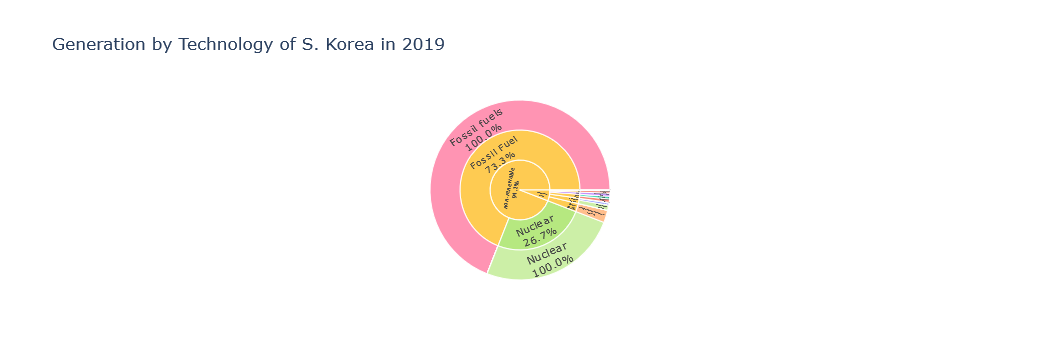

In [41]:
plot_generation_sunburst(2019, 'S. Korea')

In [11]:
df_info(df_irena, True)

size: 195804 x 7

head(5):
       country                  technology      grid  year  capacity  \
0  Afghanistan  On-grid Solar photovoltaic  Off-grid  2000       0.0   
1  Afghanistan  On-grid Solar photovoltaic  Off-grid  2001       0.0   
2  Afghanistan  On-grid Solar photovoltaic  Off-grid  2002       0.0   
3  Afghanistan  On-grid Solar photovoltaic  Off-grid  2003       0.0   
4  Afghanistan  On-grid Solar photovoltaic  Off-grid  2004       0.0   

   generation  utilization  
0         0.0          NaN  
1         0.0          NaN  
2         0.0          NaN  
3         0.0          NaN  
4         0.0          NaN  
...
tail(5):
         country                  technology     grid  year  capacity  \
195799  Zimbabwe  Other non-renewable energy  On-grid  2016       0.0   
195800  Zimbabwe  Other non-renewable energy  On-grid  2017       0.0   
195801  Zimbabwe  Other non-renewable energy  On-grid  2018       0.0   
195802  Zimbabwe  Other non-renewable energy  On-grid  2019  

In [12]:
# capacity 데이터에 아래 이슈가 있다.
# technology가 fossil_fuels에 해당하는 capacity는
# technology가 coal, oil, gas, fossil fuel n.e.s.에 해당하는 capacity들의 합이다.
# df에서 capacity를 sum하면 fossil fuels가 중복해서 합산된다.
# 이를 피하기 위해 coal, oil, gas, fossil fuel n.e.s.에 해당하는 행을 삭제한다.
# generation 데이터에는 이런 이슈가 없다.
technologies_to_drop = ['Coal and peat', 'Oil',
                        'Natural gas', 'Fossil fuels n.e.s.']
index_to_drop = df_irena[df_irena['technology'].isin(
    technologies_to_drop)].index
df_irena.drop(index=index_to_drop, axis='index', inplace=True)



In [13]:
df_focus_countries = pd.read_excel(
    k_focus_country_file_name, skiprows=2, index_col=0)
df_focus_countries.set_index('country')
df_info(df_focus_countries, True)

size: 37 x 4

head(5):
   country  accessionYear   pop2021  match found
1      USA         1961.0  332915073         213
2   Mexico         1994.0  130262216         129
3    Japan         1964.0  126050804         102
4   Turkey         1961.0   85042738         204
5  Germany         1961.0   83900473          79
...
tail(5):
       country  accessionYear      pop2021  match found
33      Latvia         2016.0       1866942         111
34     Estonia         2010.0       1325185          66
35  Luxembourg         1961.0        634814         117
36     Iceland         1961.0        343353          93
37      Russia            NaN  146,022,030          165
columns:
Index(['country', 'accessionYear', ' pop2021 ', 'match found'], dtype='object')
country:
# of unique values: 37
values: ['USA' 'Mexico' 'Japan' 'Turkey' 'Germany' 'UK' 'France' 'Italy'
 'S. Korea' 'Spain' 'Canada' 'Poland' 'Australia' 'Chile' 'Netherlands'
 'Belgium' 'Czech Republic' 'Greece' 'Portugal' 'Sweden' 'Hungary'
 

In [14]:
# df_oecd의 coutnry들이 df_irena에 모두 있는지 확인한다.
irena_countries = set(df_irena['country'].to_list())
oecd_countries = set(df_focus_countries['country'].to_list())
if irena_countries.issuperset(oecd_countries):
    print(f'ok: df_irena includes all oecd countries.')
else:
    print(f'nok:')
    print(f'the following oecd countries are not included in df_irena:')
    pprint.pprint(oecd_countries - irena_countries)
    print('program finished.')
    sys.exit()

ok: df_irena includes all oecd countries.


In [17]:
def world_capacity(year):
    # year년 상위 국가들의 생산 용량 [MW]
    df_sorted = df.sort_values(by='capacity', ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    korea_total = df_sorted.iloc[korea_rank]['capacity']

    color_list = ['lightsteelblue' for country in df_sorted.index]
    color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

    # rank_ul = max(korea_rank, k_rank_ul_min)
    # print(df_sorted[:rank_ul])
    df_sorted[:rank_ul].plot(y='capacity', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'World Capacity in {year}')
    plt.ylabel('Capacity [MW]')
    # plt.gca().get_legend().remove()

    annotate_y_coord = min(max(
        korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['capacity'].max())
    plt.gca().annotate(f'Korea: {korea_total:,.0f}MW\nrank : {korea_rank + 1}',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_cap.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)


    df_korea = df_irena[df_irena['year'] == year].groupby(
        ['country']).get_group('S. Korea')

    cap_world_total = df_irena[df_irena['year'] == year]['capacity'].sum()
    cap_korea_total = df_korea['capacity'].sum()
    cap_korea_pct = cap_korea_total / cap_world_total * 100

    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
    print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
    print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    
    


In [18]:
def world_generation(year):
    # year년 상위 국가들의 생산량 [GWh]
    df_sorted = df.sort_values(by='generation', ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    korea_total = df_sorted.iloc[korea_rank]['generation']

    color_list = ['lightsteelblue' for country in df_sorted.index]
    color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

    df_sorted[:rank_ul].plot(y='generation', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'World Generation in {year}')
    plt.ylabel('generation [GWh]')

    annotate_y_coord = min(max(
        korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
    plt.gca().annotate(f'Korea {korea_total:,.0f}GWh\nrank : {korea_rank + 1}', xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    df_korea = df_irena[df_irena['year'] == year].groupby(
        ['country']).get_group('S. Korea')
    gen_world_total = df_irena[df_irena['year'] == year]['generation'].sum()
    gen_korea_total = df_korea['generation'].sum()
    gen_korea_pct = gen_korea_total / gen_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'generation world total [GWh]: {gen_world_total:>16,.0f}')
    print(f'generation korea total [GWh]: {gen_korea_total:>16,.0f}')
    print(f'generation korea percent [%]: {gen_korea_pct:>16,.1f}')



In [19]:
def world_capacity_generation(year):
    # year년 상위 국가들의 생산 용량[MW]과 생산량 [GWh]
    df_sorted = df.sort_values(by='capacity', ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    korea_cap_total = df_sorted.iloc[korea_rank]['capacity']
    korea_gen_total = df_sorted.iloc[korea_rank]['generation']

    rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

    df_sorted[:rank_ul].plot(y=['capacity', 'generation'], kind='bar')
    plt.grid(axis='y')
    plt.title(f'World Capacity and Generation in {year}')
    plt.ylabel('capacity [MW] & generation [GWh]')

    annotate_y_coord = min(max(
        korea_gen_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['capacity'].max())

    plt.gca().annotate(f'Korea\ncapacity    {korea_cap_total:,.0f}MW\ngeneration {korea_gen_total:,.0f}GWh',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_cap_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    df_korea = df_irena[df_irena['year'] == year].groupby(
        ['country']).get_group('S. Korea')

    cap_world_total = df_irena[df_irena['year'] == year]['capacity'].sum()
    cap_korea_total = df_korea['capacity'].sum()
    cap_korea_pct = cap_korea_total / cap_world_total * 100

    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
    print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
    print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    

    gen_world_total = df_irena[df_irena['year'] == year]['generation'].sum()
    gen_korea_total = df_korea['generation'].sum()
    gen_korea_pct = gen_korea_total / gen_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'generation world total [GWh]: {gen_world_total:>16,.0f}')
    print(f'generation korea total [GWh]: {gen_korea_total:>16,.0f}')
    print(f'generation korea percent [%]: {gen_korea_pct:>16,.1f}')


In [20]:
def world_utilization(year):
    # year년 상위 국가의 가동률(= generation / capacity) [GWh / MW = kh]
    df_sorted = df.sort_values(by='utilization', ascending=False)
    # print(df_utilization_sorted.head(30))
    korea_rank = list(df_sorted.index).index('S. Korea')
    util_korea = df_sorted.iloc[korea_rank]['utilization']

    color_list = ['lightsteelblue' for country in df_sorted.index]
    color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

    df_sorted[:rank_ul].plot(y='utilization', kind='bar', color=color_list)
    plt.gca().axhline(365 * 24 / 1000, ls='--', color='r')
    plt.grid(axis='y')
    plt.title(f'Utilization in {year}')
    plt.ylabel('utilization [kh] = generation [GWh] / capacity [MW]')

    annotate_y_coord = min(max(
        util_korea * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['utilization'].max())
    plt.gca().annotate(f'Korea {util_korea:,.3f}kh',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round, pad=0.2', fc='yellow', alpha=0.3))
    plt.gca().annotate(f'utilization limit [= 365 days x 24 h / day] {365 * 24 / 1000:,.3f}kh',
                        xy=(rank_ul // 2, 365 * 24 / 1000 * 0.95), fontsize=10, color='white',
                        bbox=dict(boxstyle='round, pad=0.2', fc='red'))


    # print(f'There are {365 * 24:,} hours in a year.')

    png_file_name = f'world_{year}_util.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    util_world_mean = df_irena[df_irena['year'] == year]['utilization'].mean()

    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'utilization world mean [GWh]: {util_world_mean:>16,.0f}')
    print(f'utilization korea      [GWh]: {util_korea:>16,.0f}')


In [21]:
def world_renewable_capacity(year):
    # year년 상위 국가의 renewable energy 생산 용량 [MW]
    filt = (df_irena['technology'].isin(renewables)) & (df_irena['year'] == year)

    df = df_irena.loc[filt, ['country', 'technology', 'capacity', 'generation']].groupby('country').sum()

    # print(df)
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)

    df_sorted = df.sort_values(by=['capacity', 'generation'], ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    korea_total = df_sorted.iloc[korea_rank]['capacity']

    color_list = ['lightsteelblue' for country in df_sorted.index]
    color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(korea_rank, df_sorted)

    df_sorted[:rank_ul].plot(
        y='capacity', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'World Capacity of Renewables in {year}')
    plt.ylabel('capacity [MW]')

    annotate_y_coord = min(max(
        korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['capacity'].max())
    plt.gca().annotate(f'Korea {korea_total:,.0f}MW',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_renewables_cap.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    cap_world_total = df['capacity'].sum()
    cap_korea_total = korea_total
    cap_korea_pct = cap_korea_total / cap_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
    print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
    print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    
    print()


    df = df_irena[df_irena['year'] == year].groupby(
        ['country', 'technology']).sum()
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)
    for energy in renewables:
        df_sorted = df[df['technology'] == energy].sort_values(
            by=['capacity', 'generation'], ascending=False)
        korea_rank = list(df_sorted.index).index('S. Korea')
        korea_total = df_sorted.iloc[korea_rank]['capacity']

        color_list = ['lightsteelblue' for country in df_sorted.index]
        color_list[korea_rank] = 'deepskyblue'

        rank_ul = get_rank_ul(korea_rank, df_sorted)

        df_sorted[:rank_ul].plot(
            y='capacity', kind='bar', color=color_list)
        plt.grid(axis='y')
        plt.title(f'Capacity of {energy} in {year}')
        plt.ylabel('capacity [MW]')

        annotate_y_coord = min(max(
            korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['capacity'].max())
        plt.gca().annotate(f'Korea {korea_total:,.0f}MW',
                            xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

        png_file_name = f'world_{year}_{energy}_cap.png'
        save_or_show_fig(save=k_figsave, file_name=png_file_name)

        cap_world_total = df_sorted['capacity'].sum()
        cap_korea_total = korea_total
        cap_korea_pct = cap_korea_total / cap_world_total * 100


        print(f'technology                  : {energy}')
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
        print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
        print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    

        print()

In [22]:
def world_renewable_generation(year):

    # year년 상위 국가들의 renewable energy 생산량 [GWh]
    # 위에서 만든 df를 이용한다.
    # df = df_irena[df_irena['year'] == year].groupby(['country', 'technology']).sum()
    # df.reset_index(inplace=True)
    # df.set_index('country', inplace=True)

    # year년 상위 국가의 renewable energy 생산 용량 [MW]
    filt = (df_irena['technology'].isin(renewables)) & (df_irena['year'] == year)

    df = df_irena.loc[filt, ['country', 'technology', 'capacity', 'generation']].groupby('country').sum()

    # print(df)
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)

    df_sorted = df.sort_values(by=['generation', 'capacity'], ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    korea_total = df_sorted.iloc[korea_rank]['generation']

    color_list = ['lightsteelblue' for country in df_sorted.index]
    color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(korea_rank, df_sorted)

    df_sorted[:rank_ul].plot(
        y='generation', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'World Generation of Renewables in {year}')
    plt.ylabel('Generation [GWh]')

    annotate_y_coord = min(max(
        korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
    plt.gca().annotate(f'Korea {korea_total:,.0f}GWh',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_renewables_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    gen_world_total = df_sorted['generation'].sum()
    gen_korea_total = korea_total
    gen_korea_pct = gen_korea_total / gen_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
    print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
    print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    
    print()



    df = df_irena[df_irena['year'] == year].groupby(
        ['country', 'technology']).sum()
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)
    for energy in renewables:
        df_sorted = df[df['technology'] == energy].sort_values(
            by=['generation', 'capacity'], ascending=False)
        korea_rank = list(df_sorted.index).index('S. Korea')
        korea_total = df_sorted.iloc[korea_rank]['generation']

        color_list = ['lightsteelblue' for country in df_sorted.index]
        color_list[korea_rank] = 'deepskyblue'

        rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

        df_sorted[:rank_ul].plot(
            y='generation', kind='bar', color=color_list)
        plt.grid(axis='y')
        plt.title(f'Generation of {energy} in {year}')
        plt.ylabel('generation [GWh]')

        annotate_y_coord = min(max(
            korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
        plt.gca().annotate(f'Korea {korea_total:,.0f}GWh',
                            xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

        png_file_name = f'world_{year}_{energy}_gen.png'
        save_or_show_fig(save=k_figsave, file_name=png_file_name)

        gen_world_total = df_sorted['generation'].sum()
        gen_korea_total = korea_total
        gen_korea_pct = gen_korea_total / gen_world_total * 100


        print(f'technology                  : {energy}')
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
        print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
        print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    

        print()

In [23]:
def world_renewable_capacity_generation(year):
    # year년 상위 국가들의 renewable energy 생산 용량, 생산량

    filt = (df_irena['technology'].isin(renewables)) & (df_irena['year'] == year)

    df = df_irena.loc[filt, ['country', 'technology', 'capacity', 'generation']].groupby('country').sum()

    # print(df)
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)

    df_sorted = df.sort_values(by=['capacity', 'generation'], ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    cap_korea_total = df_sorted.iloc[korea_rank]['capacity']
    gen_korea_total = df_sorted.iloc[korea_rank]['generation']

    # color_list = ['lightsteelblue' for country in df_sorted.index]
    # color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(korea_rank, df_sorted)

    df_sorted[:rank_ul].plot(
        y=['capacity', 'generation'], kind='bar')
    plt.grid(axis='y')
    plt.title(f'World Capacity and Generatin of Renewables in {year}')
    plt.ylabel('capacity [MW] & generation [GWh]')

    annotate_y_coord = min(max(
        gen_korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
    plt.gca().annotate(f'Korea:\ncapacity: {cap_korea_total:,.0f}MW\ngeneration: {gen_korea_total:,.0f}GWh',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'world_{year}_renewables_cap_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    cap_world_total = df['capacity'].sum()
    cap_korea_pct = cap_korea_total / cap_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
    print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
    print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    
    print()

    gen_world_total = df['generation'].sum()
    gen_korea_pct = gen_korea_total / gen_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
    print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
    print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    


    df = df_irena[df_irena['year'] == year].groupby(
        ['country', 'technology']).sum()
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)
    for energy in renewables:
        df_sorted = df[df['technology'] == energy].sort_values(
            by=['capacity', 'generation'], ascending=False)
        korea_rank = list(df_sorted.index).index('S. Korea')
        korea_cap_total = df_sorted.iloc[korea_rank]['capacity']
        korea_gen_total = df_sorted.iloc[korea_rank]['generation']

        rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

        df_sorted[:rank_ul].plot(
            y=['capacity', 'generation'], kind='bar', stacked=False)
        plt.grid(axis='y')
        plt.title(f'World Capacity and Generation of {energy} in {year}')
        plt.ylabel('capacity [MW] & generation[GWh]')

        annotate_y_coord = min(max(
            korea_gen_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
        plt.gca().annotate(f'Korea\ncapacity    {korea_cap_total:,.0f}MW\ngeneration {korea_gen_total:,.0f}GWh',
                            xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

        png_file_name = f'world_{year}_{energy}_cap_gen.png'
        save_or_show_fig(save=k_figsave, file_name=png_file_name)

        cap_world_total = df_sorted['capacity'].sum()
        cap_korea_total = korea_cap_total
        cap_korea_pct = cap_korea_total / cap_world_total * 100 if cap_world_total != 0 else 0
        print(f'Technology                  : {energy}')
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
        print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
        print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    

        gen_world_total = df_sorted['generation'].sum()
        gen_korea_total = korea_gen_total
        gen_korea_pct = gen_korea_total / gen_world_total * 100 if gen_world_total != 0 else 0
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
        print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
        print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    
        print()



In [24]:
def world_renewable_capacity_generation_utilization(year):
    # year년 상위 국가들의 renewable energy 생산 용량, 생산량, 가동률

    filt = (df_irena['technology'].isin(renewables)) & (df_irena['year'] == year)

    df = df_irena.loc[filt, ['country', 'technology', 'capacity', 'generation']].groupby('country').sum()
    df['utilization'] = df['generation'] / df['capacity']

    # print(df)
    # print(df.loc['S. Korea'])

    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)

    df_sorted = df.sort_values(by=['capacity', 'generation'], ascending=False)
    korea_rank = list(df_sorted.index).index('S. Korea')
    cap_korea_total = df_sorted.iloc[korea_rank]['capacity']
    gen_korea_total = df_sorted.iloc[korea_rank]['generation']

    # color_list = ['lightsteelblue' for country in df_sorted.index]
    # color_list[korea_rank] = 'deepskyblue'

    rank_ul = get_rank_ul(korea_rank, df_sorted)

    df_sorted[:rank_ul].plot(
        y=['capacity', 'generation'], kind='bar')
    plt.grid(axis='y')
    plt.title(f'World Capacity, Generatin and Utilization of Renewables in {year}')
    plt.ylabel('capacity [MW] & generation [GWh]')

    annotate_y_coord = min(max(
        gen_korea_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
    plt.gca().annotate(f'Korea:\ncapacity: {cap_korea_total:,.0f}MW\ngeneration: {gen_korea_total:,.0f}GWh',
                        xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    ax = plt.gca()
    df_sorted[:rank_ul].plot(
        y='utilization', kind='line', linestyle='--', secondary_y=True, sharex=True, rot=90, ax=ax)
    plt.ylabel('utilization [kh]')
    ax.grid(axis='y')


    png_file_name = f'world_{year}_renewables_cap_gen_util.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    cap_world_total = df['capacity'].sum()
    cap_korea_pct = cap_korea_total / cap_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
    print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
    print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    
    print()

    gen_world_total = df['generation'].sum()
    gen_korea_pct = gen_korea_total / gen_world_total * 100
    print(f'Korea ranking               : {korea_rank + 1:>16}')
    print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
    print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
    print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    


    df = df_irena[df_irena['year'] == year].groupby(
        ['country', 'technology']).sum()
    df.reset_index(inplace=True)
    df.set_index('country', inplace=True)    
    for energy in renewables:
        df_sorted = df[df['technology'] == energy].sort_values(
            by=['capacity', 'generation'], ascending=False)
        korea_rank = list(df_sorted.index).index('S. Korea')
        korea_cap_total = df_sorted.iloc[korea_rank]['capacity']
        korea_gen_total = df_sorted.iloc[korea_rank]['generation']

        rank_ul = get_rank_ul(rank=korea_rank, df=df_sorted)

        df_sorted[:rank_ul].plot(
            y=['capacity', 'generation'], kind='bar', stacked=False)
        plt.ylabel('capacity [MW]/ generation[GWh]')
        ax = plt.gca()

        plt.title(f'Capacity and Generation of {energy} in {year}')

        annotate_y_coord = min(max(
            korea_gen_total * 1.2, plt.gca().get_ylim()[1] * 0.1), df_sorted['generation'].max())
        plt.gca().annotate(f'Korea\ncapacity    {korea_cap_total:,.0f}MW\ngeneration {korea_gen_total:,.0f}GWh',
                            xy=(korea_rank, annotate_y_coord), fontsize=10, color='green',
                            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

        df_sorted[:rank_ul].plot(
            y='utilization', kind='line', linestyle='--', secondary_y=True, sharex=True, rot=90, ax=ax)
        plt.ylabel('utilization [kh]')
        ax.grid(axis='y')

        png_file_name = f'world_{year}_{energy}_cap_gen_util.png'
        save_or_show_fig(save=k_figsave, file_name=png_file_name)


        cap_world_total = df_sorted['capacity'].sum()
        cap_korea_total = korea_cap_total
        cap_korea_pct = cap_korea_total / cap_world_total * 100 if cap_world_total != 0 else 0
        print(f'Technology                  : {energy}')
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'capacity world total [MW]   : {cap_world_total:>16,.0f}')
        print(f'capacity Korea total [MW]   : {cap_korea_total:>16,.0f}')
        print(f'capacity Korea percent [%]  : {cap_korea_pct:>16,.1f}')    

        gen_world_total = df_sorted['generation'].sum()
        gen_korea_total = korea_gen_total
        gen_korea_pct = gen_korea_total / gen_world_total * 100 if gen_world_total != 0 else 0
        print(f'Korea ranking               : {korea_rank + 1:>16}')
        print(f'generation world total [MW] : {gen_world_total:>16,.0f}')
        print(f'generation Korea total [MW] : {gen_korea_total:>16,.0f}')
        print(f'generation Korea percent [%]: {gen_korea_pct:>16,.1f}')    

        util_korea = df_sorted.iloc[korea_rank]['utilization']
        print(f'utilization [kh]            : {util_korea:>16,.1f}')
        print()



In [25]:
def print_summary(year, country):
    global capacity_total, cap_renewable_total, cap_renewable_pct
    global generation_total, gen_renewable_total, gen_renewable_pct

    # console output
    print(f'{country} / {year}:')
    print('\t{:>16}{:>16}{:>16}{:>16}'.format(
        '', 'total', 'renewable', '%_renewable'))
    print('\t{:16}{:16,.0f}{:16,.0f}{:16,.1f}%'.format(
        'capacity[MW]', capacity_total, cap_renewable_total, cap_renewable_pct))
    print('\t{:16}{:16,.0f}{:16,.0f}{:16,.1f}%'.format(
        'generation[GWh]', generation_total, gen_renewable_total, gen_renewable_pct))
    print()

    

In [26]:
def plot_capacity(year, country):
    # plot country_year_cap.png

    df_cy.sort_values(
        by=['capacity', 'generation'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')
        
        
    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y='capacity', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'Capacity by Technology in MW of {country} in {year}')
    plt.ylabel('capacity [MW]')
    plt.xticks(rotation=90)
    annotate_y_coord = min(cap_renewable_total,
                            df_cy['capacity'].max())
    plt.gca().annotate(f'renewable total {cap_renewable_total:,.0f}MW', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_cap.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)


In [27]:
def plot_capacity_percent(year, country):
    # plot country_year_cap_pct.png

    df_cy.sort_values(
        by=['capacity', 'generation'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')
            
    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y='capacity_pct', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'% Capacity by Technology in Percent of {country} in {year}')
    plt.ylabel('capacity [%]')
    plt.xticks(rotation=90)
    annotate_y_coord = min(
        cap_renewable_pct, df_cy['capacity_pct'].max())
    plt.gca().annotate(f'renewable total {cap_renewable_pct:,.1f}%', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_cap_pct.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)


In [28]:
def plot_generation(year, country):
    # plot country_year_gen.png

    df_cy.sort_values(
        by=['generation', 'capacity'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')

    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y='generation', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'Generation by Technology in GWh of {country} in {year}')
    plt.ylabel('generation[GWh]')
    plt.xticks(rotation=90)
    annotate_y_coord = min(gen_renewable_total,
                            df_cy['generation'].max())
    plt.gca().annotate(f'renewable total {gen_renewable_total:,.0f}GWh', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)


In [29]:
def plot_generation_percent(year, country):
    # plot country_year_gen_pct.png

    df_cy.sort_values(
        by=['generation', 'capacity'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')

    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y='generation_pct', kind='bar', color=color_list)
    plt.grid(axis='y')
    plt.title(f'% Generation by Technology in Percent of {country} in {year}')
    plt.ylabel('generation [%]')
    plt.xticks(rotation=90)

    annotate_y_coord = min(
        gen_renewable_pct, df_cy['generation_pct'].max())
    plt.gca().annotate(f'renewable total {gen_renewable_pct:.1f}%', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_gen_pct.png'
    save_or_show_fig(k_figsave, png_file_name)



In [30]:
def plot_capacity_generation(year, country):
    # plot country_year_cap_gen.png

    df_cy.sort_values(
        by=['capacity', 'generation'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')

    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y=['capacity', 'generation'], kind='bar')
    plt.grid(axis='y')
    plt.title(
        f'Capacity and Generation by Technology of {country} in {year}')
    plt.ylabel('capacity [MW] / generation [GWh]')
    plt.xticks(rotation=90)
    annotate_y_coord = min(cap_renewable_total,
                            df_cy['generation'].max())
    plt.gca().annotate(f'renewable total:\ncapacity    {cap_renewable_total:,.0f}MW\ngeneration {gen_renewable_total:,.0f}GWh', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_cap_gen.png'
    save_or_show_fig(save=k_figsave, file_name=png_file_name)

    

In [31]:
def plot_capacity_generation_percent(year, country):
    # plot country_year_cap_gen_pct.png


    df_cy.sort_values(by=['capacity', 'generation'], ascending=False, inplace=True)

    color_list = []
    technologies = df_cy[df_cy['grid'] ==
                            'On-grid']['technology'].to_list()
    for i, technology in enumerate(technologies):
        found = False
        for renewable in renewables:
            if renewable in technology:
                found = True
                break
        color_list.append('green' if found else 'lightsteelblue')

    df_cy[df_cy['grid'] == 'On-grid'].plot(
        x='technology', y=['capacity_pct', 'generation_pct'], kind='bar')
    plt.grid(axis='y')
    plt.title(
        f'% Capacity and Generation by Technology of {country} in {year}')
    plt.ylabel('capacity [%] / generation [%]')
    plt.xticks(rotation=90)
    annotate_y_coord = min(
        cap_renewable_pct, df_cy['capacity_pct'].max())
    plt.gca().annotate(f'renewable total:\ncapacity    {cap_renewable_pct:,.1f}%\ngeneration {gen_renewable_pct:,.1f}%', xy=(3, annotate_y_coord), fontsize=10, color='green',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

    png_file_name = f'{country}_{year}_cap_gen_pct.png'
    save_or_show_fig(k_figsave, png_file_name)    

In [34]:
# calculation by year and country
# years = [2018, 2019, 2020]
years = [2019]

countries = oecd_countries
countries = ['S. Korea', 'China', 'USA', 'Japan']
# countries = []  # G20, G8, 관심국들의 그래프를 그릴 때 이용한다.

for year in years:
    print(f'world / {year}')
    # year년의 country별 그룹
    df = df_irena[df_irena['year'] == year].groupby('country').sum()
    df.loc[:, 'utilization'] = df.loc[:, 'generation'] / df.loc[:, 'capacity']   # [kh]. utilization은 sum()하면 안 된다.

    world_capacity(year)
    world_generation(year)
    world_capacity_generation(year)
    world_utilization(year)
    world_renewable_capacity(year)
    world_renewable_generation(year)
    world_renewable_capacity_generation(year)
    world_renewable_capacity_generation_utilization(year)

    for country in countries:
        # calc
        df_grp_cy = df_irena.groupby(['country', 'year'])
        df_cy = df_grp_cy.get_group((country, year))

        generation_total = df_cy['generation'].sum()
        df_cy.loc[:, 'generation_pct'] = df_cy.loc[:, 'generation'] / generation_total * 100

        capacity_total = df_cy['capacity'].sum()
        df_cy.loc[:, 'capacity_pct'] = df_cy.loc[:, 'capacity'] / capacity_total * 100

        gen_renewable_total = df_cy[df_cy['technology'].isin(
            renewables)]['generation'].sum()
        cap_renewable_total = df_cy[df_cy['technology'].isin(
            renewables)]['capacity'].sum()

        gen_renewable_pct = gen_renewable_total / generation_total * 100 if generation_total != 0 else 0
        cap_renewable_pct = cap_renewable_total / capacity_total * 100 if capacity_total != 0 else 0


        # plot
        plot_capacity(year, country)
        plot_capacity_percent(year, country)
        plot_generation(year, country)
        plot_generation_percent(year, country)
        plot_capacity_generation(year, country)
        plot_capacity_generation_percent(year, country)
        print_summary(year, country)




world / 2019
	world_2019_cap.png
Korea ranking               :               10
capacity world total [MW]   :        7,365,732
capacity Korea total [MW]   :          134,167
capacity Korea percent [%]  :              1.8
	world_2019_gen.png
Korea ranking               :                9
generation world total [GWh]:       26,766,124
generation korea total [GWh]:          581,493
generation korea percent [%]:              2.2
	world_2019_cap_gen.png
Korea ranking               :               10
capacity world total [MW]   :        7,365,732
capacity Korea total [MW]   :          134,167
capacity Korea percent [%]  :              1.8
Korea ranking               :               10
generation world total [GWh]:       26,766,124
generation korea total [GWh]:          581,493
generation korea percent [%]:              2.2
	world_2019_util.png
Korea ranking               :               23
utilization world mean [GWh]:                3
utilization korea      [GWh]:                4
	world_20

C:\Users\haese\AppData\Local\Temp/ipykernel_18672/686785432.py:85: RuntimeWarning: invalid value encountered in double_scalars
  gen_korea_pct = gen_korea_total / gen_world_total * 100


technology                  : Pumped storage
Korea ranking               :                8
generation world total [MW] :          114,489
generation Korea total [MW] :            3,458
generation Korea percent [%]:              3.0

	world_2019_Solid biofuels_gen.png
technology                  : Solid biofuels
Korea ranking               :               14
generation world total [MW] :          389,147
generation Korea total [MW] :            5,415
generation Korea percent [%]:              1.4

	world_2019_Renewable municipal waste_gen.png
technology                  : Renewable municipal waste
Korea ranking               :               25
generation world total [MW] :           68,506
generation Korea total [MW] :              163
generation Korea percent [%]:              0.2

	world_2019_Liquid biofuels_gen.png
technology                  : Liquid biofuels
Korea ranking               :                2
generation world total [MW] :            8,382
generation Korea total [MW] : 

C:\Users\haese\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\haese\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


	S. Korea_2019_cap.png
	S. Korea_2019_cap_pct.png
	S. Korea_2019_gen.png
	S. Korea_2019_gen_pct.png
	S. Korea_2019_cap_gen.png
	S. Korea_2019_cap_gen_pct.png
S. Korea / 2019:
	                           total       renewable     %_renewable
	capacity[MW]             134,167          23,488            17.5%
	generation[GWh]          581,493          34,113             5.9%

	China_2019_cap.png
	China_2019_cap_pct.png
	China_2019_gen.png
	China_2019_gen_pct.png
	China_2019_cap_gen.png
	China_2019_cap_gen_pct.png
China / 2019:
	                           total       renewable     %_renewable
	capacity[MW]           2,010,932         795,168            39.5%
	generation[GWh]        7,504,487       2,048,587            27.3%

	USA_2019_cap.png
	USA_2019_cap_pct.png
	USA_2019_gen.png
	USA_2019_gen_pct.png
	USA_2019_cap_gen.png
	USA_2019_cap_gen_pct.png
USA / 2019:
	                           total       renewable     %_renewable
	capacity[MW]           1,127,769         284,362            25

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'png\\world'

In [35]:
if k_figsave:
    print('moving output files')
    dirs = ['png\\world', 'png\\country']
    files = ['world*.png', '*.png']  # 순서가 중요하다.
    for i, dir in enumerate(dirs):
        if not os.path.isdir(dir):
            os.mkdir(dir)
        command = f'move {files[i]} {dir}'
        print(command)
        os.system(command)
    print('moving output files complete')

os.chdir(home_dir)

print('program finished')


moving output files
move world*.png png\world
move *.png png\country
moving output files complete
program finished
